(Chap_GMM)=
# Generalized Method of Moments Estimation

This chapter describes the generalized method of moments (GMM) estimation method. All data and images from this chapter can be found in the data directory ([./data/gmm/](https://github.com/OpenSourceEcon/CompMethods/tree/main/data/gmm/)) and images directory ([./images/gmm/](https://github.com/OpenSourceEcon/CompMethods/tree/main/images/gmm/)) for the GitHub repository for this online book.


(SecGMM_GMMvMLE)=
## GMM vs. MLE: Strengths and weaknesses

A paper by {cite}`FuhrerEtAl:1995` studies the accuracy and efficiency of the maximum likelihood (ML) estimator versus the generalized method of moments (GMM) estimator in the context of a simple linear-quadratic inventory model. They find that ML has some very nice properties over GMM in small samples when the model is simple. In the spirit of the {cite}`FuhrerEtAl:1995` paper, we list the strengths and weaknesses of MLE vs. GMM more generally. I recommend you read the introduction to {cite}`FuhrerEtAl:1995`. This paper provides big support for maximum likelihood estimation over generalized method of moments. However, GMM estimation allows for less strong assumptions.
* GMM almost always rejects the model (Hansen J-test)
* MLE supports the model, kind of by assumption
* "Monte Carlo experiments reveal that the GMM estimates are often biased (apparently due to poor instruments), statistically insignificant, economically implausible, and dynamically unstable."
* "The ML estimates are generally unbiased (even in misspecifipd models), statistically significant, economically plausible, and dynamically stable."
* "Asymptotic standard errors for ML are 3 to 15 times smaller than for GMM."


(SecGMM_MLEstr)=
### MLE strengths

* More statistical significance. In general, MLE provides more statistical significance for parameter estimates than does GMM. This comes from the strong distributional assumptions that are necessary for the ML estimates.
* ML estimates are less sensitive to parameter or model normalizations than are GMM estimates.
* ML estimates have nice small sample properties. ML estimates have less bias and more efficiency with small data samples than GMM estimates in many cases.


(SecGMM_MLEwk)=
### MLE weaknesses

* MLE requires strong distributional assumptions. For MLE, the data generating process (DGP) must be completely specified. This assumes a lot of knowledge about the DGP. This assumption is likely almost always wrong.
* MLE is very difficult in rational expectations models. This is because the consistency of beliefs induces a nonlinearity in the likelihood function that makes it difficult to find the global optimum.
* MLE is very difficult in nonlinear models. The likelihood function can become highly nonlinear in MLE even if the model is linear when the data are irregular. This difficulty is multiplied when the model itself is more complicated and nonlinear.


(SecGMM_GMMstr)=
### GMM strengths

* GMM allows for most flexible identification. GMM estimates can be identified by any set of moments from the data as long as you have at least as many moments as you have parameters to estimate and that those moments are independent enough to identify the parameters. (And the parameters are independent enough of each other to be separately identified.)
* Good large sample properties. The GMM estimator is strongly consistent and asymptotically normal. GMM will likely be the best estimator if you have a lot of data.
* GMM requires minimal assumptions about the DGP. In GMM, you need not specify the distributions of the error terms in your model of the DGP. This is often a strength, given that most error are not observed and most models are gross approximations of the true DGP.


(SecGMM_GMMwk)=
### GMM weaknesses

* GMM estimates are usually less statistically significant than ML estimates. This comes from the minimal distributional assumptions. GMM parameter estimates usually are measured with more error.
* GMM estimates can be sensitive to normalizations of the model or parameters.
* GMM estimates have bad small sample properties. GMM estimates can have large bias and inefficiency in small samples.


(SecGMM_keyqst)=
### Key questions when deciding between MLE and GMM

* How much data is available for the estimation? Large data samples will make GMM relatively more attractive than MLE because of the nice large sample properties of GMM and fewer required assumptions on the model.
* How complex is the model? Linear models or quadratic models are much easier to do using MLE than are more highly nonlinear models. Rational expectations models (macroeconomics) create an even more difficult level of nonlinearity that pushes you toward GMM estimation.
* How comfortable are you making strong distributional assumptions? MLE requires a complete specification of all distributional assumptions of the model DGP. If you think these assumptions are too strong, you should use GMM.


(SecGMM_GMMest)=
## The GMM estimator

GMM was first formalized by {cite}`Hansen:1982`. A strength of GMM estimation is that the econometrician can remain completely agnostic as to the distribution of the random variables in the DGP. For identification, the econometrician simply needs at least as many moment conditions from the data as he has parameters to estimate.

A *moment* of the data is broadly defined as any statistic that summarizes the data to some degree. A data moment could be as narrow as an individual observation from the data or as broad as the sample average. GMM estimates the parameters of a model or data generating process to make the model moments as close as possible to the corresponding data moments. See {cite}`DavidsonMacKinnon:2004`, chapter 9 for a more detailed treatment of GMM. The estimation methods of linear least squares, nonlinear least squares, generalized least squares, and instrumental variables estimation are all specific cases of the more general GMM estimation method.

Let $m(x)$ be an $R\times 1$ vector of moments from the real world data $x$, where $m_r(x)$ is the $r$th data moment. And let $x$ be an $N\times K$ matrix of data with $K$ columns representing $K$ variables and $N$ observations.

```{math}
    :label: EqGMM_GMMest_datamomvec
    m(x) \equiv \left[m_1(x), m_2(x), ...m_R(x)\right]^T
```

Let the model DGP be characterized as $F(x,\theta)=0$, where $F$ is a vector of equations, each of which is a function of the data $x$ and the $K\times 1$ parameter vector $\theta$. Then define $m(x|\theta)$ as a vector of $R$ moments from the model that correspond to the real-world moment vector $m(x)$, where $m_r(x|\theta)$ is the $r$th model moment.

```{math}
    :label: EqGMM_GMMest_modmomvec
    m(x|\theta) \equiv \left[m_1(x|\theta), m_2(x|\theta), ...m_R(x|\theta)\right]^T
```

Note that GMM requires both real world data $x$ and moments that can be calculated from both the data $m(x)$ and from the model $m(x|\theta)$ in order to estimate the parameter vector $\hat{\theta}_{GMM}$. There is also a stochastic way to generate moments from the model, which we discuss later in our section on Simulated Method of Moments (SMM).

The GMM approach of estimating the parameter vector $\hat{\theta}_{GMM}$ is to choose $\theta$ to minimize some distance measure of the model moments $m(x|\theta)$ from the data moments $m(x)$.

```{math}
    :label: EqGMM_GMMest_genprob
    \hat{\theta}_{GMM}=\theta:\quad \min_{\theta}\: ||m(x|\theta) - m(x)||
```

The distance measure $||m(x|\theta) - m(x)||$ can be any kind of norm. But it is important to recognize that your estimates $\hat{\theta}_{GMM}$ will be dependent on what distance measure (norm) you choose. The most widely studied and used distance metric in GMM estimation is the $L^2$ norm or the sum of squared errors in moments. Define the moment error function $e(x|\theta)$ as the $R \times 1$ vector of either the percent difference in the vector of model moments from the data moments or the simple difference.

```{math}
    :label: EqGMM_GMMest_momerr
    e(x|\theta) \equiv \frac{m(x|\theta) - m(x)}{m(x)} \quad\text{or}\quad e(x|\theta) \equiv m(x|\theta) - m(x)
```

It is important when possible that the error function $e(x|\theta)$ be a percent deviation of the moments (given that none of the data moments are 0). This puts all the moments in the same units, which helps make sure that no moments receive unintended weighting simply due to their units. This ensures that the problem is scaled properly and does not suffer from ill conditioning. However, percent deviations become computationally problematic when the data moments are zero or close to zero. In that case, you would use a simple difference.

The GMM estimator is the following,

```{math}
    :label: EqGMM_GMMest_qdrprob
    \hat{\theta}_{GMM}=\theta:\quad \min_{\theta}\:e(x|\theta)^T \, W \, e(x|\theta)
```

where $W$ is an $R\times R$ weighting matrix in the criterion function. For now, think of this weighting matrix as the identity matrix. But we will show in Section {ref}`SecGMM_Wgt` a more optimal weighting matrix. We call the quadratic form expression $e(x|\theta)^T \, W \, e(x|\theta)$ the *criterion function* because it is a strictly positive scalar that is the object of the minimization in the GMM problem in the general statement of the problem {eq}`EqGMM_GMMest_genprob` and in the sum of squared errors version of the problem {eq}`EqGMM_GMMest_qdrprob`. The $R\times R$ weighting matrix $W$ in the criterion function allows the econometrician to control how each moment is weighted in the minimization problem. For example, an $R\times R$ identity matrix for $W$ would give each moment equal weighting of 1, and the criterion function would be a simply sum of squared percent deviations (errors). Other weighting strategies can be dictated by the nature of the problem or model.


(SecGMM_Wgt)=
## The weighting matrix (W)

In the GMM criterion function in the problem statement {eq}`EqGMM_GMMest_qdrprob`, some moment weighting matrices $W$ produce precise estimates while others produce poor estimates with large variances. We want to choose the optimal weighting matrix $W$ with the smallest possible asymptotic variance. This is an efficient optimal GMM estimator. The optimal weighting matrix is the inverse variance covariance matrix of the moments at the optimal parameter values,

```{math}
    :label: EqGMM_Wgt_gen
    W^{opt} \equiv \Omega^{-1}(x|\hat{\theta}_{GMM})
```

where $\Omega(x|\theta)$ is the variance covariance matrix of the moment condition errors $E(x|\theta)$ from each observation in the data (to be defined below). The intuition for using the inverse variance covariance matrix $\Omega^{-1}$ as the optimal weighting matrix is the following. You want to downweight moments that have a high variance, and you want to weight more heavily the moments that are generated more precisely.

Notice that this definition of the optimal weighting matrix is circular. $W^{opt}$ is a function of the GMM estimates $\hat{\theta}_{GMM}$, but the optimal weighting matrix is used in the estimation of $\hat{\theta}_{GMM}$. This means that one has to use some kind of iterative fixed point method to find the true optimal weighting matrix $W^{opt}$. Below are some examples of weighting matrices to use.


(SecGMM_Wgt_I)=
### The identity matrix (W=I)

Many times, you can get away with just using the identity matrix as your weighting matrix $W = I$. This changes the criterion function to a simple sum of squared error functions such that each moment has the same weight.

```{math}
    :label: EqGMM_GMMest_WI
    \hat{\theta}_{GMM}=\theta:\quad \min_{\theta}\:e(x|\theta)^T \, e(x|\theta)
```

If the problem is well conditioned and well identified, then your GMM estimates $\hat{\theta}_{GMM}$ will not be greatly affected by this simplest of weighting matrices.


(SecGMM_Wgt_2step)=
### Two-step variance-covariance estimator of W

The most common method of estimating the optimal weighting matrix for GMM estimates is the two-step variance covariance estimator. The name "two-step" refers to the two steps used to get the weighting matrix.

The first step is to estimate the GMM parameter vector $\hat{\theta}_{1,GMM}$ using the simple identity matrix as the weighting matrix $W = I$ as in {eq}`EqGMM_GMMest_WI`.

```{math}
    :label: EqGMM_GMMest_2stp_1
    \hat{\theta}_{1, GMM}=\theta:\quad \min_{\theta}\:e(x|\theta)^T \, I \, e(x|\theta)
```

As we will show in {eq}`EqGMM_estW_2step`, the optimal two-step weighting matrix is the inverse of the variance-covariance matrix of the moment error vector $e(x|\theta)$. To get an estimate of the variance-covariance matrix of the error moment vector, we need a matrix of errors that represents how the calculation of each moment varies across the $N$ observations in the data.

Define $E(x|\theta)$ as the $R\times N$ moment error matrix such that the average across each row gives the moment error vector. When the errors are simple differences, the $E(x|\theta)$ matrix is the following,

```{math}
    :label: EqGMM_GMMest_2stp_ErrMatSimp
    E(x|\theta) =
    \begin{bmatrix}
        m_1(x|\theta) - m_1(x_1) & m_1(x|\theta) - m_1(x_2) & ... & m_1(x|\theta) - m_1(x_N) \\
        m_2(x|\theta) - m_2(x_1) & m_2(x|\theta) - m_2(x_2) & ... & m_2(x|\theta) - m_2(x_N) \\
        \vdots & \vdots & \ddots & \vdots \\
        m_R(x|\theta) - m_R(x_1) & m_R(x|\theta) - m_R(x_2) & ... & m_R(x|\theta) - m_R(x_N) \\
    \end{bmatrix}
```

where $m_r(x_i)$ is a function associated with the $r$th moment and the $i$th data observation. When the errors are percent deviations, the $E(x|\theta)$ matrix is the following,

```{math}
    :label: EqGMM_GMMest_2stp_ErrMatPct
    E(x|\theta) =
    \begin{bmatrix}
        \frac{m_1(x|\theta) - m_1(x_1)}{m_1(x_1)} & \frac{m_1(x|\theta) - m_1(x_2)}{m_1(x_2)} & ... & \frac{m_1(x|\theta) - m_1(x_N)}{m_1(x_N)} \\
        \frac{m_2(x|\theta) - m_2(x_1)}{m_2(x_1)} & \frac{m_2(x|\theta) - m_2(x_2)}{m_2(x_2)} & ... & \frac{m_2(x|\theta) - m_2(x_N)}{m_2(x_N)} \\
        \vdots & \vdots & \ddots & \vdots \\
        \frac{m_R(x|\theta) - m_R(x_1)}{m_R(x_1)} & \frac{m_R(x|\theta) - m_R(x_2)}{m_R(x_2)} & ... & \frac{m_R(x|\theta) - m_R(x_N)}{m_R(x_N)} \\
    \end{bmatrix}
```

where the denominator of the percentage deviation or baseline is the model moment that does not change. We use the $E(x|\theta)$ data matrix and the Step 1 GMM estimate $e(x|\hat{\theta}_{1,GMM})$ to get a new estimate of the variance covariance matrix.

```{math}
    :label: EqGMM_GMMest_2stp_2VarCov
    \hat{\Omega}_2 = \frac{1}{N}E(x|\hat{\theta}_{1,GMM})\,E(x|\hat{\theta}_{1,GMM})^T
```

This is simply saying that the $(r,s)$-element of the $R\times R$ estimator of the variance-covariance matrix of the moment vector is the following.

```{math}
    :label: EqGMM_2stepVarCov_rs
    \hat{\Omega}_{2,r,s} = \frac{1}{N}\sum_{i=1}^N\Bigl[m_r(x|\theta) - m_{r}(x_i)\Bigr]\Bigl[m_s(x|\theta) - m_s(x_i)\Bigr]
```

The optimal weighting matrix is the inverse of the two-step variance covariance matrix.

```{math}
    :label: EqGMM_estW_2step
    \hat{W}^{two-step} \equiv \hat{\Omega}_2^{-1}
```

Lastly, re-estimate the GMM estimator using the optimal two-step weighting matrix $\hat{W}^{2step}$.

```{math}
    :label: EqGMM_theta_2step_2
    \hat{\theta}_{2,GMM}=\theta:\quad \min_{\theta}\:e(x|\theta)^T \, \hat{W}^{two-step} \, e(x|\theta)
```

$\hat{\theta}_{2,GMM}$ is called the two-step GMM estimator.


(SecGMM_W_iter)=
### Iterated variance-covariance estimator of W

The truly optimal weighting matrix $W^{opt}$ is the iterated variance-covariance estimator of $W$. This procedure is to just repeat the process described in the two-step GMM estimator until the estimated weighting matrix no longer significantly changes between iterations. Let $i$ index the $i$th iterated GMM estimator,

```{math}
    :label: EqGMM_theta_2step_i
    \hat{\theta}_{i, GMM}=\theta:\quad \min_{\theta}\:e(x|\theta)^T \, \hat{W}_{i} \, e(x|\theta)
```

and the $(i+1)$th estimate of the optimal weighting matrix is defined as the following.

```{math}
    :label: EqGMM_estW_istep
    \hat{W}_{i+1} \equiv \hat{\Omega}_{i+1}^{-1}\quad\text{where}\quad \hat{\Omega}_{i+1} = \frac{1}{N}E(x|\hat{\theta}_{i,GMM})\,E(x|\hat{\theta}_{i,GMM})^T
```

The iterated GMM estimator $\hat{\theta}_{it,GMM}$ is the $\hat{\theta}_{i,GMM}$ such that $\hat{W}_{i+1}$ is very close to $\hat{W}_{i}$ for some distance metric (norm).

```{math}
    :label: EqGMM_theta_it
    \hat{\theta}_{it,GMM} = \hat{\theta}_{i,GMM}: \quad || \hat{W}_{i+1} - \hat{W}_{i} || < \varepsilon
```


(SecGMM_W_NW)=
### Newey-West consistent estimator of $\Omega$ and W

The Newey-West estimator of the optimal weighting matrix and variance covariance matrix is consistent in the presence of heteroskedasticity and autocorrelation in the data (See {cite}`NeweyWest:1987`). {cite}`AddaCooper:2003` (p. 82) have a nice exposition of how to compute the Newey-West weighting matrix $\hat{W}_{nw}$. The asymptotic representation of the optimal weighting matrix $\hat{W}^{opt}$ is the following:

```{math}
    :label: EqGMM_estW_WhatOpt
    \hat{W}^{opt} = \lim_{N\rightarrow\infty}\frac{1}{N}\sum_{i=1}^N \sum_{l=-\infty}^\infty E(x_i|\theta)E(x_{i-l}|\theta)^T
```

The Newey-West consistent estimator of $\hat{W}^{opt}$ is:

```{math}
    :label: EqGMM_estW_NW
    \hat{W}_{nw} = \Gamma_{0,N} + \sum_{v=1}^q \left(1 - \left[\frac{v}{q+1}\right]\right)\left(\Gamma_{v,N} + \Gamma^T_{v,N}\right)
```

where

```{math}
    :label: EqGMM_estW_NWGamma
    \Gamma_{v,N} = \frac{1}{N}\sum_{i=v+1}^N E(x_i|\theta)E(x_{i-v}|\theta)^T
```

Of course, for autocorrelation, the subscript $i$ can be changed to $t$.


(SecGMM_VarCovTheta)=
## Variance-Covariance Estimator of $\hat{\theta}$

The estimated variance-covariance matrix $\hat{\Sigma}$ of the estimated parameter vector $\hat{\theta}_{GMM}$ is different from the variance-covariance matrix $\hat{\Omega}$ of the moment vector $e(x|\theta)$ from the previous section. $\hat{\Omega}$ from the previous section is the $R\times R$ variance-covariance matrix of the $R$ moment errors used to identify the $K$ parameters $\theta$ to be estimated. The estimated variance-covariance matrix of the estimated parameter vector $\hat{\Sigma}$ is a $K\times K$ matrix. We say the model is exactly identified if $K = R$. We say the model is overidentified if $K<R$.

Similar to the inverse Hessian estimator of the variance-covariance matrix of the maximum likelihood estimator from the {ref}`Chap_MLE`, the GMM variance-covariance matrix is related to the derivative of the criterion function with respect to each parameter. The intuition is that if the second derivative of the criterion function with respect to the parameters is large, there is a lot of curvature around the criterion minimizing estimate. In other words, the parameters of the model are precisely estimated. The inverse of the Hessian matrix will be small.

Define $R\times K$ matrix $d(x|\theta)$ as the Jacobian matrix of derivatives of the $R\times 1$ error vector $e(x|\theta)$.

```{math}
    :label: EqGMM_errvec_deriv
    \begin{equation}
    d(x|\theta) \equiv
        \begin{bmatrix}
        \frac{\partial e_1(x|\theta)}{\partial \theta_1} & \frac{\partial e_1(x|\theta)}{\partial \theta_2} & ... & \frac{\partial e_1(x|\theta)}{\partial \theta_K} \\
        \frac{\partial e_2(x|\theta)}{\partial \theta_1} & \frac{\partial e_2(x|\theta)}{\partial \theta_2} & ... & \frac{\partial e_2(x|\theta)}{\partial \theta_K} \\
        \vdots & \vdots & \ddots & \vdots \\
        \frac{\partial e_R(x|\theta)}{\partial \theta_1} & \frac{\partial e_R(x|\theta)}{\partial \theta_2} & ... & \frac{\partial e_R(x|\theta)}{\partial \theta_K}
        \end{bmatrix}
    \end{equation}
```

The GMM estimates of the parameter vector $\hat{\theta}_{GMM}$ are assymptotically normal. If $\theta_0$ is the true value of the parameters, then the following holds,

```{math}
    :label: EqGMM_theta_plim
    \text{plim}_{N\rightarrow\infty}\sqrt{N}\left(\hat{\theta}_{GMM} - \theta_0\right) \sim \text{N}\left(0, \left[d(x|\theta)^T W d(x|\theta)\right]^{-1}\right)
```

where $W$ is the optimal weighting matrix from the GMM criterion function. The GMM estimator for the variance-covariance matrix $\hat{\Sigma}_{GMM}$ of the parameter vector $\hat{\theta}_{GMM}$ is the following.

```{math}
    :label: EqGMM_SigmaHat
    \hat{\Sigma}_{GMM} = \frac{1}{N}\left[d(x|\theta)^T W d(x|\theta)\right]^{-1}
```

In the examples below, we will use a finite difference method to compute numerical versions of the Jacobian matrix $d(\tilde{x},x|\theta)$. The following is a first-order forward finite difference numerical approximation of the first derivative of a function.

```{math}
    :label: EqGMM_finitediff_1
    f'(x_0) = \lim_{h\rightarrow 0} \frac{f(x_0 + h) - f(x_0)}{h}
```

The following is a centered second-order finite difference numerical approximation of the derivative of a function. (See [BYU ACME numerical differentiation lab](https://github.com/UC-MACSS/persp-model-econ_W19/blob/master/Notes/ACME_NumDiff.pdf) for more details.)

```{math}
    :label: EqGMM_finitediff_2
    f'(x_0) \approx \frac{f(x_0 + h) - f(x_0 - h)}{2h}
```


(SecGMM_Ex)=
## Code Examples

In this section, we will use GMM to estimate parameters of the models from the {ref}`Chap_MLE` chapter. We will also go through the standard moment conditions in most econometrics textbooks in which the conditional and unconditional expectations provide moments for estimation.


(SecGMM_Ex_Trunc)=
### Fitting a truncated normal to intermediate macroeconomics test scores

Let's revisit the problem from the {ref}`Chap_MLE` chapter of fitting a truncated normal distribution to intermediate macroeconomics test scores. The data are in the text file [`Econ381totpts.txt`](https://github.com/OpenSourceEcon/CompMethods/blob/main/data/gmm/Econ381totpts.txt) in the GitHub repository [`../data/gmm/`](https://github.com/OpenSourceEcon/CompMethods/tree/main/data/gmm) folder for this executable book. Recall that these test scores are between 0 and 450. {numref}`Figure %s <FigGMM_EconScores2MLEs>` below shows a histogram of the data, as well as the unconstrained and constrained maximum likelihood estimates of the truncated normal distribution from {numref}`Figure %s <FigMLE_EconScoresMLEconstr>` as well as an arbitrary distribution.

The black line is the unconstrained MLE estimate of $\mu$ and $\sigma$ of the truncated normal pdf from Section {ref}`SecMLE_DistData_min`. The red line is the constrained MLE estimate of $\mu$ and $\sigma$ from Section {ref}`SecMLE_DistData_conmin`. And the green line is an arbitrary parameterization of the truncated normal PDF.

In [1]:
import scipy.stats as sts


def trunc_norm_pdf(xvals, mu, sigma, cut_lb=None, cut_ub=None):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the truncated normal pdf with mean mu and
    standard deviation sigma. If the cutoff is given, then the PDF
    values are inflated upward to reflect the zero probability on values
    above the cutoff. If there is no cutoff given, this function does
    the same thing as sp.stats.norm.pdf(x, loc=mu, scale=sigma).
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cut_lb = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar lower bound value of distribution. Values below
             this value have zero probability
    cut_ub = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    prob_notcut = scalar
    pdf_vals = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (sts.norm.cdf(cut_ub, loc=mu, scale=sigma) -
                       sts.norm.cdf(cut_lb, loc=mu, scale=sigma))

    pdf_vals    = ((1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)

    return pdf_vals

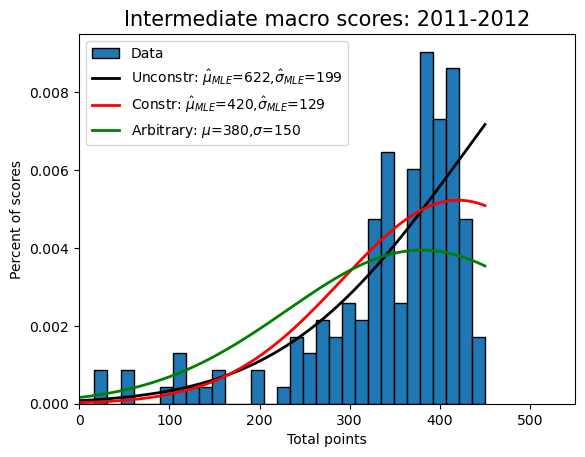

In [2]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import requests

# Download and save the data file Econ381totpts.txt as NumPy array
url = ('https://raw.githubusercontent.com/OpenSourceEcon/CompMethods/' +
       'main/data/gmm/Econ381totpts.txt')
data_file = requests.get(url, allow_redirects=True)
open('../../../data/gmm/Econ381totpts.txt', 'wb').write(data_file.content)
if data_file.status_code == 200:
    # Load the downloaded data into a NumPy array
    data = np.loadtxt('../../../data/gmm/Econ381totpts.txt')
else:
    print('Error downloading the file')

# Plot the histogram of the data
num_bins = 30
count, bins, ignored = plt.hist(data, num_bins, density=True,
                                edgecolor='k', label='Data')
plt.title('Intermediate macro scores: 2011-2012', fontsize=15)
plt.xlabel(r'Total points')
plt.ylabel(r'Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

# Plot the unconstrained MLE estimated distribution
dist_pts = np.linspace(0, 450, 500)
mu_MLE = 622.16
sig_MLE = 198.76
plt.plot(
    dist_pts,
    trunc_norm_pdf(dist_pts, mu_MLE, sig_MLE, 0, 450),
    linewidth=2, color='k',
    label='Unconstr: $\hat{\mu}_{MLE}$=622,$\hat{\sigma}_{MLE}$=199'
)

# Plot the constrained MLE estimated distribution
mu_MLE_constr = 420.0
sig_MLE_constr = 129.04
plt.plot(
    dist_pts,
    trunc_norm_pdf(dist_pts, mu_MLE_constr, sig_MLE_constr, 0, 450),
    linewidth=2, color='r',
    label='Constr: $\hat{\mu}_{MLE}$=420,$\hat{\sigma}_{MLE}$=129'
)

# Plot smooth line with distribution 1
mu_1 = 380
sig_1 = 150
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_1, sig_1, 0, 450),
         linewidth=2, color='g', label='Arbitrary: $\mu$=380,$\sigma$=150')

plt.legend(loc='upper left')

plt.show()

```{figure} ../../../images/gmm/Econ381scores_2MLEs.png
---
height: 500px
name: FigGMM_EconScores2MLEs
---
Constrained maximum likelihood estimate of truncated normal distribution to fit intermediate macroeconomics midterm scores over two semesters along with unconstrained MLE estimate and arbitrary parameterization.
```


(SecGMM_Ex_Trunc_2momI)=
#### Two moments, identity weighting matrix

Let's try estimating the parameters $\mu$ and $\sigma$ by GMM. What moments should we use? Let's try the mean and variance of the data. These two statistics of the data are defined by:

```{math}
    :label: EqGMM_Ex_Trunc_2momI_mean
    mean(scores_i) = \frac{1}{N}\sum_{i=1}^N scores_i
```

```{math}
    :label: EqGMM_Ex_Trunc_2momI_var
    var(scores_i) = \frac{1}{N}\sum_{i=1}^{N} \left(scores_i - mean(scores_i)\right)^2
```

So the data moment vector $m(x)$ for GMM is the following.

```{math}
    :label: EqGMM_Ex_Trunc_2momI_datamoms
    m(scores_i) \equiv \begin{bmatrix} mean(scores_i) \\ var(scores_i) \end{bmatrix}
```

And the model moment vector $m(x|\theta)$ for GMM is the following.

```{math}
    :label: EqGMM_Ex_Trunc_2momI_modmoms
    m(scores_i|\mu,\sigma) \equiv \begin{bmatrix} mean(scores_i|\mu,\sigma) \\ var(scores_i|\mu,\sigma) \end{bmatrix}
```

Define the error vector as the vector of percent deviations of the model moments from the data moments.

```{math}
    :label: EqGMM_Ex_Trunc_2momI_errvec
    e(scores_i|\mu,\sigma) \equiv \frac{m(scores_i|\mu,\sigma) - m(scores_i)}{m(scores_i)}
```

The mimization problem for the GMM estimator for this moment vector is the following.

```{math}
    :label: EqGMM_Ex_Trunc_2momI_minprob
    (\hat{\mu}_{GMM},\hat{\sigma}_{GMM}) = (\mu,\sigma):\quad \min_{\mu,\sigma} e(scores_i|\mu,\sigma)^T \, W \, e(scores_i|\mu,\sigma)
```

Keep in mind that the $\mu$ and $\sigma$ we are estimating are the two truncated normal parameters in contrast to the empirical mean of the data $mean(scores_i)$ and the empirical variance of the data $var(scores_i)$.

Something interesting to note here is the $1/N$ weighting on our variance estimator. There is less bias in the estimator of the variance by using the weighting $1/(N-1)$ because one degree of freedom is used in calculating the mean used in the variance calculation. However, in GMM when many moments are used that might have differing degrees of freedom restrictions, it is important to have the same weighting for each moment. So we use $1/N$ in all cases.

Now let's define a criterion function that takes as inputs the parameters and the estimator for the weighting matrix $\hat{W}$.

In [3]:
import scipy.integrate as intgr

def data_moments(xvals):
    '''
    --------------------------------------------------------------------
    This function computes the two data moments for GMM
    (mean(data), variance(data)).
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N,) vector, test scores data

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    mean_data = scalar, mean value of test scores data
    var_data  = scalar > 0, variance of test scores data

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: mean_data, var_data
    --------------------------------------------------------------------
    '''
    mean_data = xvals.mean()
    var_data = xvals.var()

    return mean_data, var_data


def model_moments(mu, sigma, cut_lb, cut_ub):
    '''
    --------------------------------------------------------------------
    This function computes the two model moments for GMM
    (mean(model data), variance(model data)).
    --------------------------------------------------------------------
    INPUTS:
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cut_lb = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar lower bound value of distribution. Values below
             this value have zero probability
    cut_ub = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        trunc_norm_pdf()
        xfx()
        x2fx()

    OBJECTS CREATED WITHIN FUNCTION:
    mean_model = scalar, mean value of test scores from model
    m_m_err    = scalar > 0, estimated error in the computation of the
                 integral for the mean of the distribution
    var_model  = scalar > 0, variance of test scores from model
    v_m_err    = scalar > 0, estimated error in the computation of the
                 integral for the variance of the distribution

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: mean_model, var_model
    --------------------------------------------------------------------
    '''
    xfx = lambda x: x * trunc_norm_pdf(x, mu, sigma, cut_lb, cut_ub)
    (mean_model, m_m_err) = intgr.quad(xfx, cut_lb, cut_ub)
    x2fx = lambda x: ((x - mean_model) ** 2) * trunc_norm_pdf(x, mu, sigma, cut_lb, cut_ub)
    (var_model, v_m_err) = intgr.quad(x2fx, cut_lb, cut_ub)

    return mean_model, var_model


def err_vec(xvals, mu, sigma, cut_lb, cut_ub, simple):
    '''
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for GMM.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, test scores data
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cut_lb = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar lower bound value of distribution. Values below
             this value have zero probability
    cut_ub = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    simple = boolean, =True if errors are simple difference, =False if
             errors are percent deviation from data moments

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        data_moments()
        model_moments()

    OBJECTS CREATED WITHIN FUNCTION:
    mean_data  = scalar, mean value of data
    var_data   = scalar > 0, variance of data
    moms_data  = (2, 1) matrix, column vector of two data moments
    mean_model = scalar, mean value from model
    var_model  = scalar > 0, variance from model
    moms_model = (2, 1) matrix, column vector of two model moments
    err_vec    = (2, 1) matrix, column vector of two moment error
                 functions

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    mean_data, var_data = data_moments(xvals)
    moms_data = np.array([[mean_data], [var_data]])
    mean_model, var_model = model_moments(mu, sigma, cut_lb, cut_ub)
    moms_model = np.array([[mean_model], [var_model]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data

    return err_vec


def criterion(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the GMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 3 tuple, (xvals, cutoff, W_hat)
    xvals  = (N,) vector, values of the truncated normally distributed
             random variable
    cut_lb = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar lower bound value of distribution. Values below
             this value have zero probability
    cut_ub = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    W_hat  = (R, R) matrix, estimate of optimal weighting matrix

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        norm_pdf()

    OBJECTS CREATED WITHIN FUNCTION:
    err        = (2, 1) matrix, column vector of two moment error
                 functions
    crit_val   = scalar > 0, GMM criterion function value

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, cut_lb, cut_ub, W = args
    err = err_vec(xvals, mu, sigma, cut_lb, cut_ub, simple=False)
    crit_val = err.T @ W @ err

    return crit_val

Now we can perform the GMM estimation. Let's start with the identity matrix as our estimate for the optimal weighting matrix $W = I$.

In [4]:
import scipy.optimize as opt

# Note that this takes a little time because the intgr.quad() commands
# are a little slow
mu_init = 400
sig_init = 60
params_init = np.array([mu_init, sig_init])
W_hat = np.eye(2)
gmm_args = (data, 0.0, 450.0, W_hat)
results = opt.minimize(criterion, params_init, args=(gmm_args))
results = opt.minimize(criterion, params_init, args=(gmm_args),
                       tol=1e-14, method='L-BFGS-B',
                       bounds=((1e-10, None), (1e-10, None)))
mu_GMM1, sig_GMM1 = results.x
print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1)
print("")
print("SciPy.optimize.minimize results are the following:")
print(results)

mu_GMM1= 622.0452991337212  sig_GMM1= 198.72061665917036

SciPy.optimize.minimize results are the following:
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 2.6188955144709652e-18
        x: [ 6.220e+02  1.987e+02]
      nit: 19
      jac: [-2.986e-13  1.192e-12]
     nfev: 87
     njev: 29
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


The data moments, model moments at the optimal parameters, and error vector values are the following.

In [5]:
mean_data, var_data = data_moments(data)
mean_model, var_model = model_moments(mu_GMM1, sig_GMM1, 0.0, 450.0)
err1 = err_vec(data, mu_GMM1, sig_GMM1, 0.0, 450.0, False).reshape(2,)
print('Mean of points =', mean_data, ', Variance of points =', var_data)
print('Mean of model =', mean_model, ', Variance of model =', var_model)
print('Error vector=', err1)

Mean of points = 341.90869565217395 , Variance of points = 7827.997292398056
Mean of model = 341.9086951086106 , Variance of model = 7827.997290030685
Error vector= [-1.58979102e-09 -3.02423591e-10]


As we can see from the criterion function value at the optimum (2.69e-18) and from the difference between the model moments and data moments, this GMM estimation matches the moments very well. This GMM estimation is also very close to the unconstrained MLE estimates from Section {ref}`SecMLE_DistData_min`.

{numref}`Figure %s <FigGMM_SurfCrit1>` shows the criterion function surface for different values of $\mu$ and $\sigma$ in the neighborhood of our GMM estimate.

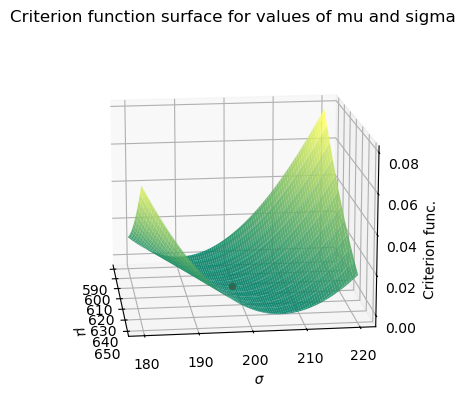

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
cmap1 = matplotlib.colormaps.get_cmap('summer')

critfunc_GMM1 = criterion(np.array([mu_GMM1, sig_GMM1]),
                          data, 0.0, 450.0, W_hat)

mu_vals = np.linspace(590, 650, 90)
sig_vals = np.linspace(180, 220, 100)
critfunc_vals = np.zeros((90, 100))
for mu_ind in range(90):
    for sig_ind in range(100):
        critfunc_vals[mu_ind, sig_ind] = \
            criterion(np.array([mu_vals[mu_ind], sig_vals[sig_ind]]),
                      data, 0.0, 450.0, W_hat)[0][0]

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(mu_mesh.T, sig_mesh.T, critfunc_vals, rstride=8,
                cstride=1, cmap=cmap1, alpha=0.9)
ax.scatter(mu_GMM1, sig_GMM1, critfunc_GMM1, color='red', marker='o',
           s=18, label='GMM estimate')
ax.view_init(elev=15, azim=-7, roll=0)
ax.set_title('Criterion function surface for values of mu and sigma')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
ax.set_zlabel(r'Criterion func.')

plt.show()

```{figure} ../../../images/gmm/Econ381scores_SurfaceCrit1.png
---
height: 500px
name: FigGMM_SurfCrit1
---
Surface of the 2 moment, identity weighting matrix GMM criterion function for values of $\mu$ and $\sigma$ in the neighborhood of the GMM estimate. The scatter point represents the criterion function value for the GMM estimate.
```

Let's compute the GMM estimator for the variance-covariance matrix $\hat{\Sigma}_{GMM}$ of our GMM estimates $\hat{\theta}_{GMM}$ using the equation in Section 4 based on the Jacobian $d(x|\hat{\theta}_{GMM})$ of the moment error vector $e(x|\hat{\theta}_{GMM})$ from the criterion function at the estimated (optimal) parameter values $\hat{\theta}_{GMM}$. We first write a function that computes the Jacobian $d(x|\hat{\theta}_{GMM})$.

In [7]:
import numpy.linalg as lin

def Jac_err2(xvals, mu, sigma, cut_lb, cut_ub, simple=False):
    '''
    This function computes the Jacobian matrix of partial derivatives of the
    R x 1 moment error vector e(x|theta) with respect to the K parameters
    theta_i in the K x 1 parameter vector theta. The resulting matrix is the
    R x K Jacobian.
    '''
    Jac_err = np.zeros((2, 2))
    h_mu = 1e-8 * mu
    h_sig = 1e-8 * sigma
    Jac_err[:, 0] = (
        (err_vec(xvals, mu + h_mu, sigma, cut_lb, cut_ub, simple) -
         err_vec(xvals, mu - h_mu, sigma, cut_lb, cut_ub, simple)) /
        (2 * h_mu)
    ).flatten()
    Jac_err[:, 1] = (
        (err_vec(xvals, mu, sigma + h_sig, cut_lb, cut_ub, simple) -
         err_vec(xvals, mu, sigma - h_sig, cut_lb, cut_ub, simple)) /
        (2 * h_sig)
    ).flatten()

    return Jac_err

N = data.shape[0]
d_err2 = Jac_err2(data, mu_GMM1, sig_GMM1, 0.0, 450.0, False)
print("Jacobian matrix of derivatives")
print(d_err2)
print("")
print("Weighting matrix")
print(W_hat)
SigHat2 = (1 / N) * lin.inv(d_err2.T @ W_hat @ d_err2)
print("")
print("Sigma hat squared")
print(SigHat2)
print("")
print("Standard errors")
print('Std. err. mu_hat=', np.sqrt(SigHat2[0, 0]))
print('Std. err. sig_hat=', np.sqrt(SigHat2[1, 1]))

Jacobian matrix of derivatives
[[ 0.00057977 -0.00191677]
 [-0.00244916  0.00973172]]

Weighting matrix
[[1. 0.]
 [0. 1.]]

Sigma hat squared
[[680416.6956242  172529.83657673]
 [172529.83657673  43810.65660118]]

Standard errors
Std. err. mu_hat= 824.873745262995
Std. err. sig_hat= 209.30995342118365


Note how big the standard errors are on our GMM estimated parameters using the identity matrix as our optimal weighting matrix.


(SecGMM_Ex_Trunc_2mom2st)=
#### Two moments, two-step weighting matrix

Similar to the MLE problem, the GMM criterion function surface in {numref}`Figure %s <FigGMM_SurfCrit1>` looks like it is roughly equal for a specific portion increase of $\mu$ and $\sigma$ together. That is, with these two moments probably have a correspondence of values of $\mu$ and $\sigma$ that give roughly the same criterion function value. This issue has two possible solutions.

1. Maybe we need the two-step variance covariance estimator to calculate a "more" optimal weighting matrix $W$.
2. Maybe our two moments aren't very good moments for fitting the data.

Let's first try the two-step weighting matrix using the steps from Section {ref}`SecGMM_Wgt_2step` in equations {eq}`EqGMM_GMMest_2stp_2VarCov` and {eq}`EqGMM_estW_2step`.

The following function creates the moment error matrix for this problem defined in {eq}`EqGMM_GMMest_2stp_ErrMatPct`.

In [8]:
def get_Err_mat2(xvals, mu, sigma, cut_lb, cut_ub, simple=False):
    '''
    --------------------------------------------------------------------
    This function computes the R x N matrix of errors from each
    observation for each moment. In this function, we have hard coded
    R = 2.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, test scores data
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cut_lb = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar lower bound value of distribution. Values below
             this value have zero probability
    cut_ub = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    simple = boolean, =True if errors are simple difference, =False if
             errors are percent deviation from data moments

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        model_moments()

    OBJECTS CREATED WITHIN FUNCTION:
    R          = integer = 2, hard coded number of moments
    N          = integer >= R, number of data observations
    Err_mat    = (R, N) matrix, error by moment and observation data
    mean_model = scalar, mean value from model
    var_model  = scalar > 0, variance from model

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: Err_mat
    --------------------------------------------------------------------
    '''
    R = 2
    N = len(xvals)
    Err_mat = np.zeros((R, N))
    mean_data = xvals.mean()
    mean_model, var_model = model_moments(mu, sigma, cut_lb, cut_ub)
    if simple:
        Err_mat[0, :] = xvals - mean_model
        Err_mat[1, :] = ((mean_data - xvals) ** 2) - var_model
    else:
        Err_mat[0, :] = (xvals - mean_model) / mean_model
        Err_mat[1, :] = (((mean_data - xvals) ** 2) - var_model) / var_model

    return Err_mat

In [9]:
Err_mat = get_Err_mat2(data, mu_GMM1, sig_GMM1, 0.0, 450.0, False)
VCV2 = (1 / len(data)) * (Err_mat @ Err_mat.T)
print("VCV2=")
print(VCV2)
W_hat2 = lin.inv(VCV2)
print("")
print("W_hat2=")
print(W_hat2)

VCV2=
[[ 0.0669623  -0.43803414]
 [-0.43803414  4.78818521]]

W_hat2=
[[37.18863472  3.40210144]
 [ 3.40210144  0.52007942]]


Now we can perform the GMM estimation with the optimal two-step weighting matrix.

In [10]:
# Note that this takes a little time because the intgr.quad() commands
# are a little slow
mu_init = 400  # alternative initial guess is mu_GMM1
sig_init = 60   # alternative initial guess is sig_GMM1
params_init = np.array([mu_init, sig_init])
gmm_args = (data, 0.0, 450.0, W_hat2)
results = opt.minimize(criterion, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM2, sig_GMM2 = results.x
print('mu_GMM2=', mu_GMM2, ' sig_GMM2=', sig_GMM2)
print("")
print("Scipy.optimize.minimize results:")
print(results)

mu_GMM2= 620.6308663064567  sig_GMM2= 198.31485537445292

Scipy.optimize.minimize results:
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 3.3264185347113687e-07
        x: [ 6.206e+02  1.983e+02]
      nit: 15
      jac: [-1.827e-06  4.719e-06]
     nfev: 48
     njev: 16
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


The GMM estimates here with the two-step weighting matrix are pretty similar to the estimates from the previous section that simply used the identity matrix as the weighting matrix. However, the estimated results here are sensitive to the initial guess.

But the real benefit of the two-step weighting matrix shows up in the much smaller (more efficient) estimated standard errors for the GMM parameter estimates.

In [11]:
N = data.shape[0]
d_err2_2 = Jac_err2(data, mu_GMM2, sig_GMM2, 0.0, 450.0, False)
print("Jacobian matrix of derivatives")
print(d_err2_2)
print("")
print("Weighting matrix")
print(W_hat2)
SigHat2_2 = (1 / N) * lin.inv(d_err2_2.T @ W_hat2 @ d_err2_2)
print("")
print("Sigma hat squared")
print(SigHat2_2)
print("")
print("Standard errors")
print('Std. err. mu_hat=', np.sqrt(SigHat2_2[0, 0]))
print('Std. err. sig_hat=', np.sqrt(SigHat2_2[1, 1]))

Jacobian matrix of derivatives
[[ 0.00058186 -0.00191917]
 [-0.00245583  0.00974327]]

Weighting matrix
[[37.18863472  3.40210144]
 [ 3.40210144  0.52007942]]

Sigma hat squared
[[51715.1351509  16316.40623475]
 [16316.40623475  5252.98677153]]

Standard errors
Std. err. mu_hat= 227.409619741333
Std. err. sig_hat= 72.47749148202472


(SecGMM_Ex_Trunc_4momI)=
#### Four moments, identity weighting matrix

Using a better weighting matrix didn't improve our estimates or fit very much it did improve the standard errors of our estimates. To get the right fit, we might need to choose different moments. Let's try an overidentified model $R>K$, where we estimate $\mu$ and $\sigma$ of the truncated normal distribution $K=2$ using the following four moments $R=4$.

1. The percent of observations greater than 430 (between 430 and 450)
2. The percent of observations between 320 and 430
3. The percent of observations between 220 and 320
4. The percent of observations less than 220 (between 0 and 220)

In [12]:
def data_moments4(xvals):
    '''
    --------------------------------------------------------------------
    This function computes the four data moments for GMM
    (binpct_1, binpct_2, binpct_3, binpct_4).
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N,) vector, test scores data

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    bpct_1_dat = scalar in [0, 1], percent of observations
                 0 <= x < 220
    bpct_2_dat = scalar in [0, 1], percent of observations
                 220 <= x < 320
    bpct_3_dat = scalar in [0, 1], percent of observations
                 320 <= x < 430
    bpct_4_dat = scalar in [0, 1], percent of observations
                 430 <= x <= 450

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: bpct_1, bpct_2, bpct_3, bpct_4
    --------------------------------------------------------------------
    '''
    bpct_1_dat = xvals[xvals < 220].shape[0] / xvals.shape[0]
    bpct_2_dat = (xvals[(xvals >=220) & (xvals < 320)].shape[0] /
                  xvals.shape[0])
    bpct_3_dat = (xvals[(xvals >=320) & (xvals < 430)].shape[0] /
                  xvals.shape[0])
    bpct_4_dat = xvals[xvals >= 430].shape[0] / xvals.shape[0]

    return bpct_1_dat, bpct_2_dat, bpct_3_dat, bpct_4_dat


def model_moments4(mu, sigma, cut_lb, cut_ub):
    '''
    --------------------------------------------------------------------
    This function computes the four model moments for GMM
    (binpct_1, binpct_2, binpct_3, binpct_4).
    --------------------------------------------------------------------
    INPUTS:
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cut_lb = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar lower bound value of distribution. Values below
             this value have zero probability
    cut_ub = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        trunc_norm_pdf()
        xfx()

    OBJECTS CREATED WITHIN FUNCTION:
    bpct_1_mod = scalar in [0, 1], percent of model observations in
                 bin 1
    bp_1_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_1_mod
    bpct_2_mod = scalar in [0, 1], percent of model observations in
                 bin 2
    bp_2_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_2_mod
    bpct_3_mod = scalar in [0, 1], percent of model observations in
                 bin 3
    bp_3_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_3_mod
    bpct_4_mod = scalar in [0, 1], percent of model observations in
                 bin 4
    bp_4_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_4_mod

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: bpct_1_mod, bpct_2_mod, bpct_3_mod, bpct_4_mod
    --------------------------------------------------------------------
    '''
    xfx = lambda x: trunc_norm_pdf(x, mu, sigma, cut_lb, cut_ub)
    (bpct_1_mod, bp_1_err) = intgr.quad(xfx, 0.0, 220)
    (bpct_2_mod, bp_2_err) = intgr.quad(xfx, 220, 320)
    (bpct_3_mod, bp_3_err) = intgr.quad(xfx, 320, 430)
    (bpct_4_mod, bp_4_err) = intgr.quad(xfx, 430, 450)

    return bpct_1_mod, bpct_2_mod, bpct_3_mod, bpct_4_mod


def err_vec4(xvals, mu, sigma, cut_lb, cut_ub, simple):
    '''
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for GMM.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, test scores data
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cut_lb = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar lower bound value of distribution. Values below
             this value have zero probability
    cut_ub = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    simple = boolean, =True if errors are simple difference, =False if
             errors are percent deviation from data moments

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        data_moments4()
        model_moments4()

    OBJECTS CREATED WITHIN FUNCTION:
    mean_data  = scalar, mean value of data
    var_data   = scalar > 0, variance of data
    moms_data  = (2, 1) matrix, column vector of two data moments
    mean_model = scalar, mean value from model
    var_model  = scalar > 0, variance from model
    moms_model = (2, 1) matrix, column vector of two model moments
    err_vec    = (2, 1) matrix, column vector of two moment error
                 functions

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    bpct_1_dat, bpct_2_dat, bpct_3_dat, bpct_4_dat = \
        data_moments4(xvals)
    moms_data = np.array([[bpct_1_dat], [bpct_2_dat], [bpct_3_dat],
                          [bpct_4_dat]])
    bpct_1_mod, bpct_2_mod, bpct_3_mod, bpct_4_mod = \
        model_moments4(mu, sigma, cut_lb, cut_ub)
    moms_model = np.array([[bpct_1_mod], [bpct_2_mod], [bpct_3_mod],
                          [bpct_4_mod]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data

    return err_vec


def criterion4(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the GMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 3 tuple, (xvals, cutoff, W_hat)
    xvals  = (N,) vector, values of the truncated normally distributed
             random variable
    cut_lb = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar lower bound value of distribution. Values below
             this value have zero probability
    cut_ub = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    W_hat  = (R, R) matrix, estimate of optimal weighting matrix

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        err_vec4()

    OBJECTS CREATED WITHIN FUNCTION:
    err        = (4, 1) matrix, column vector of four moment error
                 functions
    crit_val   = scalar > 0, GMM criterion function value

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, cut_lb, cut_ub, W = args
    err = err_vec4(xvals, mu, sigma, cut_lb, cut_ub, simple=False)
    crit_val = err.T @ W @ err

    return crit_val

Before performing the estimation, let's see what these four model moments would be relative to the data moments with the first GMM estimates from the two-moment GMM estimation with the identity weighting matrix from Section {ref}`SecGMM_Ex_Trunc_2momI` of $\mu\approx 622$ and $\sigma\approx 199$. Let's also look at the resulting criterion function at those values.

In [13]:
params = np.array([mu_GMM1, sig_GMM1])
print("2-moment mu_GMM1 is:", mu_GMM1, ", and 2-moment sig_GMM1 is:", sig_GMM1)
print("")
print("Data moments are the following:")
print(data_moments4(data))
print("")
print("Model moments at the GMM1 estimates are the following:")
print(model_moments4(mu_GMM1, sig_GMM1, 0.0, 450))
print("")
print("GMM criterion function value at GMM1 estimates with identity wgt mat:")
print(criterion4(params, data, 0.0, 450.0, np.eye(4))[0][0])

2-moment mu_GMM1 is: 622.0452991337212 , and 2-moment sig_GMM1 is: 198.72061665917036

Data moments are the following:
(0.08695652173913043, 0.17391304347826086, 0.6894409937888198, 0.049689440993788817)

Model moments at the GMM1 estimates are the following:
(0.10733213606963418, 0.22206800774330326, 0.533465129056967, 0.13713472713009578)

GMM criterion function value at GMM1 estimates with identity wgt mat:
3.279780799994561


Now let's perform the GMM estimation of the two parameters $\mu$ and $\sigma$ using the four moments described above and the identity weighting matrix.

In [14]:
# Note that this takes a little time because the intgr.quad() commands
# are a little slow
mu_init = 400
sig_init = 70
params_init = np.array([mu_init, sig_init])
W_hat1_4 = np.eye(4)
gmm_args = (data, 0.0, 450.0, W_hat1_4)
results_4 = opt.minimize(
    criterion4, params_init, args=(gmm_args), method='L-BFGS-B',
    bounds=((1e-10, None), (1e-10, None))
)
mu_GMM1_4, sig_GMM1_4 = results_4.x

print('mu_GMM1_4=', mu_GMM1_4, ' sig_GMM1_4=', sig_GMM1_4)
print("")
print("Scipy.optimize.minimize results:")
print(results_4)

mu_GMM1_4= 361.64944545585274  sig_GMM1_4= 92.132508955815

Scipy.optimize.minimize results:
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.9585428695214522
        x: [ 3.616e+02  9.213e+01]
      nit: 9
      jac: [-4.363e-06 -4.441e-07]
     nfev: 30
     njev: 10
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


Let's compare the model moments at these new GMM estimates to the data moments and the associated criterion function value.

In [15]:
params = np.array([mu_GMM1_4, sig_GMM1_4])
print("4-moment mu_GMM1 is:", mu_GMM1_4, ", and 4-moment sig_GMM1 is:", sig_GMM1_4)
print("")
print("Data moments are the following:")
print(data_moments4(data))
print("")
print("Model moments at the GMM1_4 estimates are the following:")
print(model_moments4(mu_GMM1_4, sig_GMM1_4, 0.0, 450))
print("")
print("GMM criterion function value at GMM1_4 estimates with identity wgt mat:")
print(criterion4(params, data, 0.0, 450.0, W_hat1_4)[0][0])

4-moment mu_GMM1 is: 361.64944545585274 , and 4-moment sig_GMM1 is: 92.132508955815

Data moments are the following:
(0.08695652173913043, 0.17391304347826086, 0.6894409937888198, 0.049689440993788817)

Model moments at the GMM1_4 estimates are the following:
(0.07465165923992131, 0.3170509469322965, 0.535759895979849, 0.07253749784793316)

GMM criterion function value at GMM1_4 estimates with identity wgt mat:
0.9585428695214522


The 4-moment GMM estimates with the identity weighting matrix of $\hat{mu}\approx 362$ and $\hat{\sigma}\approx 92$ have model moments that match the data moments much more closely that those associated with the 2-moment GMM estimates shown above. And the criterion function value of this new estimate is much lower ($\sim 0.96$) than that of the two-moment GMM estimates ($\sim 3.28$).

{numref}`Figure %s <FigGMM_EconScores4mom2mom>` shows the histogram of the intermediate macroeconomics scores with the 4-moment estimated truncated normal distribution and the 2-moment estated distribution from Section {ref}`SecGMM_Ex_Trunc_2momI`.

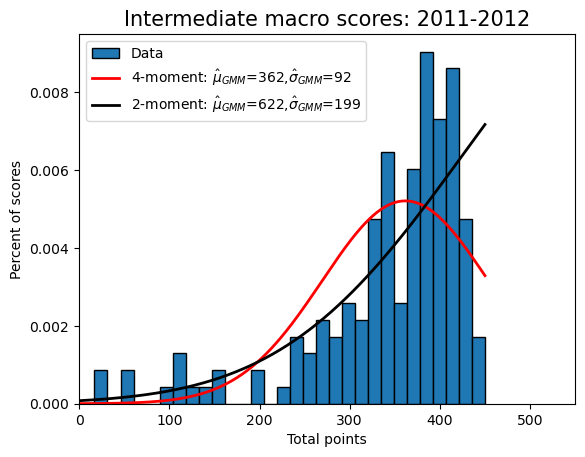

In [16]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(data, num_bins, density=True,
                                edgecolor='k', label='Data')
plt.title('Intermediate macro scores: 2011-2012', fontsize=15)
plt.xlabel(r'Total points')
plt.ylabel(r'Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

# Plot the 4-moment GMM estimated distribution
plt.plot(
    dist_pts,
    trunc_norm_pdf(dist_pts, mu_GMM1_4, sig_GMM1_4, 0, 450),
    linewidth=2, color='r',
    label='4-moment: $\hat{\mu}_{GMM}$=362,$\hat{\sigma}_{GMM}$=92'
)

# Plot the 2-moment GMM estimated distribution
plt.plot(
    dist_pts,
    trunc_norm_pdf(dist_pts, mu_GMM1, sig_GMM1, 0, 450),
    linewidth=2, color='k',
    label='2-moment: $\hat{\mu}_{GMM}$=622,$\hat{\sigma}_{GMM}$=199'
)
plt.legend(loc='upper left')

plt.show()

```{figure} ../../../images/gmm/Econ381scores_4mom2mom.png
---
height: 500px
name: FigGMM_EconScores4mom2mom
---
GMM estimated truncated normal distributions to fit intermediate macroeconomics test score data: 4-moment estimation versus 2-moment estimation.
```

We can compute the estimator of the variance-covariance matrix $\hat{\Sigma}$ of the GMM parameter estimator by computing the Jacobian of the error vector. In this case, the Jacobian $d(x|\theta)$ is $R\times K = 4\times 2$.

In [17]:
def Jac_err4(xvals, mu, sigma, cut_lb, cut_ub, simple=False):
    '''
    This function computes the Jacobian matrix of partial derivatives of the
    R x 1 moment error vector e(x|theta) with respect to the K parameters
    theta_i in the K x 1 parameter vector theta. The resulting matrix is
    R x K Jacobian.
    '''
    Jac_err = np.zeros((4, 2))
    h_mu = 1e-8 * mu
    h_sig = 1e-8 * sigma
    Jac_err[:, 0] = (
        (err_vec4(xvals, mu + h_mu, sigma, cut_lb, cut_ub, simple) -
         err_vec4(xvals, mu - h_mu, sigma, cut_lb, cut_ub, simple)) /
        (2 * h_mu)
    ).flatten()
    Jac_err[:, 1] = (
        (err_vec4(xvals, mu, sigma + h_sig, cut_lb, cut_ub, simple) -
         err_vec4(xvals, mu, sigma - h_sig, cut_lb, cut_ub, simple)) /
        (2 * h_sig)
    ).flatten()

    return Jac_err

d_err4 = Jac_err4(data, mu_GMM1_4, sig_GMM1_4, 0.0, 450.0, False)
print("Jacobian matrix of derivatives")
print(d_err4)
print("")
print("Weighting matrix")
print(W_hat1_4)
SigHat4 = (1 / N) * lin.inv(d_err4.T @ W_hat1_4 @ d_err4)
print("")
print("Sigma hat squared")
print(SigHat4)
print("")
print("Standard errors")
print('Std. err. mu_hat=', np.sqrt(SigHat4[0, 0]))
print('Std. err. sig_hat=', np.sqrt(SigHat4[1, 1]))

Jacobian matrix of derivatives
[[-0.01552584  0.03086035]
 [-0.01186598  0.00386864]
 [ 0.00363826 -0.00488294]
 [ 0.01822034  0.00020491]]

Weighting matrix
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Sigma hat squared
[[14.31483056  7.78510557]
 [ 7.78510557 10.50016556]]

Standard errors
Std. err. mu_hat= 3.7834944903706673
Std. err. sig_hat= 3.240395895001008


Note how much tighter the standard errors are here with these four moments than they were in the econometric models of Sections {ref}`SecGMM_Ex_Trunc_2momI` and {ref}`SecGMM_Ex_Trunc_2mom2st`.

{numref}`Figure %s <FigGMM_SurfCrit4>` shows the surface of the criterion function of this 4-moment problem in the neighborhood of the GMM estimate of $\hat{\mu}_{GMM}\approx 362$ and $\hat{\sigma}_{GMM}\approx 92$. This provides more evidence that the GMM estimates are a global minimum of the criterion function. There less of a flat ridge in $(\mu,\sigma)$-space as was the case in the 2-moment GMM problem and the MLE problems.

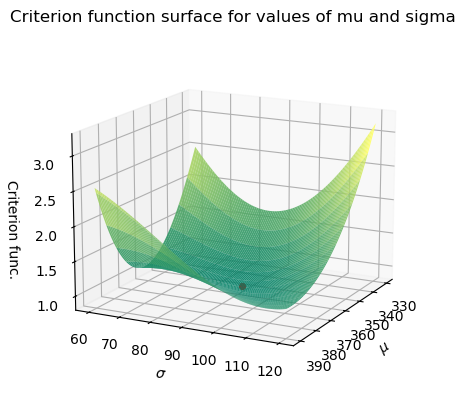

In [18]:
critfunc_GMM1_4 = criterion4(np.array([mu_GMM1_4, sig_GMM1_4]),
                            data, 0.0, 450.0, W_hat1_4)

mu_vals = np.linspace(330, 390, 90)
sig_vals = np.linspace(60, 120, 100)
critfunc_vals = np.zeros((90, 100))
for mu_ind in range(90):
    for sig_ind in range(100):
        critfunc_vals[mu_ind, sig_ind] = \
            criterion4(np.array([mu_vals[mu_ind], sig_vals[sig_ind]]),
                       data, 0.0, 450.0, W_hat1_4)[0][0]

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(mu_mesh.T, sig_mesh.T, critfunc_vals, rstride=8,
                cstride=1, cmap=cmap1, alpha=0.9)
ax.scatter(mu_GMM1_4, sig_GMM1_4, critfunc_GMM1_4, color='red', marker='o',
           s=18, label='GMM estimate')
ax.view_init(elev=15, azim=27, roll=0)
ax.set_title('Criterion function surface for values of mu and sigma')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
ax.set_zlabel(r'Criterion func.')

plt.show()

```{figure} ../../../images/gmm/Econ381scores_SurfaceCrit4.png
---
height: 500px
name: FigGMM_SurfCrit4
---
Surface of the 4 moment, identity weighting matrix GMM criterion function for values of $\mu$ and $\sigma$ in the neighborhood of the GMM estimate. The scatter point represents the criterion function value for the GMM estimate.
```


(SecGMM_Ex_Trunc_4mom2st)=
#### Four moments, two-step weighting matrix

Let's see how much things change in this 4-moment case if we use the two-step estimator for the optimal weighting matrix $W$ instead of the identity matrix.

In [19]:
def get_Err_mat4(xvals, mu, sigma, cut_lb, cut_ub, simple=False):
    '''
    --------------------------------------------------------------------
    This function computes the R x N matrix of errors from each
    observation for each moment. In this function, we have hard coded
    R = 4.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, test scores data
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cut_lb = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar lower bound value of distribution. Values below
             this value have zero probability
    cut_ub = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    simple = boolean, =True if errors are simple difference, =False if
             errors are percent deviation from data moments

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        model_moments()

    OBJECTS CREATED WITHIN FUNCTION:
    R          = 2, hard coded number of moments
    N          = integer >= R, number of data observations
    Err_mat    = (R, N) matrix, error by moment and observation data
    mean_model = scalar, mean value from model
    var_model  = scalar > 0, variance from model

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: Err_mat
    --------------------------------------------------------------------
    '''
    R = 4
    N = len(xvals)
    Err_mat = np.zeros((R, N))
    pct_1_mod, pct_2_mod, pct_3_mod, pct_4_mod = \
        model_moments4(mu, sigma, cut_lb, cut_ub)
    if simple:
        pts_in_grp1 = xvals < 220
        Err_mat[0, :] = pts_in_grp1 - pct_1_mod
        pts_in_grp2 = (xvals >= 220) & (xvals < 320)
        Err_mat[1, :] = pts_in_grp2 - pct_2_mod
        pts_in_grp3 = (xvals >= 320) & (xvals < 430)
        Err_mat[2, :] = pts_in_grp3 - pct_3_mod
        pts_in_grp4 = xvals >= 430
        Err_mat[3, :] = pts_in_grp4 - pct_4_mod
    else:
        pts_in_grp1 = xvals < 220
        Err_mat[0, :] = (pts_in_grp1 - pct_1_mod) / pct_1_mod
        pts_in_grp2 = (xvals >= 220) & (xvals < 320)
        Err_mat[1, :] = (pts_in_grp2 - pct_2_mod) / pct_2_mod
        pts_in_grp3 = (xvals >= 320) & (xvals < 430)
        Err_mat[2, :] = (pts_in_grp3 - pct_3_mod) / pct_3_mod
        pts_in_grp4 = xvals >= 430
        Err_mat[3, :] = (pts_in_grp4 - pct_4_mod) / pct_4_mod

    return Err_mat

In [20]:
Err_mat4 = get_Err_mat4(data, mu_GMM1_4, sig_GMM1_4, 0.0, 450.0, False)
VCV2_4 = (1 / len(data)) * (Err_mat4 @ Err_mat4.T)
print("VCV2_4=")
print(VCV2_4)
# We use the pseudo-inverse command here because the VCV matrix is
# poorly conditioned
W_hat2_4 = lin.pinv(VCV2_4)
print("")
print("W_hat2_4=")
print(W_hat2_4)

VCV2_4=
[[14.27388248 -0.71336383 -1.45167736 -0.8498477 ]
 [-0.71336383  1.63304445 -0.83538039 -0.23355073]
 [-1.45167736 -0.83538039  0.82821591 -0.97186426]
 [-0.8498477  -0.23355073 -0.97186426  9.07359554]]

W_hat2_4=
[[ 0.06838551 -0.00850159 -0.00505903  0.00414641]
 [-0.00850159  0.34794467 -0.20203496 -0.01984217]
 [-0.00505903 -0.20203496  0.12073767 -0.00349282]
 [ 0.00414641 -0.01984217 -0.00349282  0.10825784]]


With the two-step optimal weighting matrix, we can estimate this 4-moment problem by GMM.

In [21]:
# Note that this takes a little time because the intgr.quad() commands
# are a little slow
mu_init = mu_GMM1_4
sig_init = sig_GMM1_4
params_init = np.array([mu_init, sig_init])
gmm_args = (data, 0.0, 450.0, W_hat2_4)
results2_4 = opt.minimize(criterion4, params_init, args=(gmm_args),
                          method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM2_4, sig_GMM2_4 = results2_4.x
print('mu_GMM2_4=', mu_GMM2_4, ' sig_GMM2_4=', sig_GMM2_4)
print("")
print("Scipy.optimize.minimize results:")
print(results2_4)

/tmp/ipykernel_2846/3397713799.py:48: RuntimeWarning: invalid value encountered in scalar divide
  pdf_vals    = ((1/(sigma * np.sqrt(2 * np.pi)) *
/tmp/ipykernel_2846/4026398128.py:82: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  (bpct_1_mod, bp_1_err) = intgr.quad(xfx, 0.0, 220)
/tmp/ipykernel_2846/4026398128.py:83: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  (bpct_2_mod, bp_2_err) = intgr.quad(xfx, 220, 320)
/tmp/ipykernel_2846/4026398128.py:84: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  (bpct_3_mod, bp_3_err) = intgr.quad(xfx, 320, 430)
/tmp/ipykernel_2846/4026398128.py:85: IntegrationWarning: The occurrence of round

mu_GMM2_4= 365.2119545518343  sig_GMM2_4= 49.02027875393562

Scipy.optimize.minimize results:
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.0677439730049783
        x: [ 3.652e+02  4.902e+01]
      nit: 10
      jac: [-1.402e-06  2.577e-06]
     nfev: 66
     njev: 22
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


In this case, the two-step estimator creates a fairly significant change in the estimates from that of the previous section with the identity weighting matrix. The estimate of $\mu$ stays roughly the same, but the estimate of $\sigma$ is one-half the size--from $(\mu=362,\sigma=92)$ with the idenity weighting matrix to this estimate of $(\mu=365,\sigma=49)$ with the two-step weighting matrix.

The criterion function surface in {numref}`Figure %s <FigGMM_SurfCrit4_2>` shows the criterion function for different values of $\mu$ and $\sigma$. It has a clear minimum in a certain area. But it also has some really interesting nonlinearities.

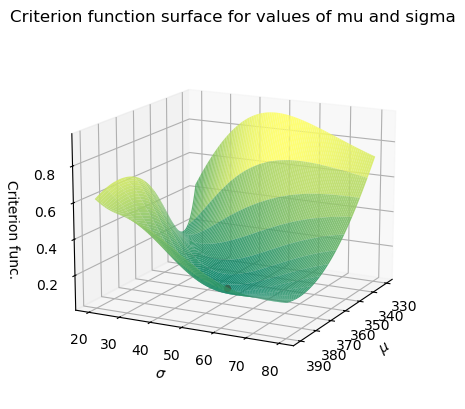

In [22]:
critfunc_GMM2_4 = criterion4(np.array([mu_GMM2_4, sig_GMM2_4]),
                             data, 0.0, 450.0, W_hat2_4)

mu_vals = np.linspace(330, 390, 90)
sig_vals = np.linspace(20, 80, 100)
critfunc_vals = np.zeros((90, 100))
for mu_ind in range(90):
    for sig_ind in range(100):
        critfunc_vals[mu_ind, sig_ind] = \
            criterion4(np.array([mu_vals[mu_ind], sig_vals[sig_ind]]),
                       data, 0.0, 450.0, W_hat2_4)[0][0]

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(mu_mesh.T, sig_mesh.T, critfunc_vals, rstride=8,
                cstride=1, cmap=cmap1, alpha=0.9)
ax.scatter(mu_GMM2_4, sig_GMM2_4, critfunc_GMM2_4, color='red', marker='o',
           s=18, label='GMM estimate')
ax.view_init(elev=15, azim=27, roll=0)
ax.set_title('Criterion function surface for values of mu and sigma')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
ax.set_zlabel(r'Criterion func.')

plt.show()

```{figure} ../../../images/gmm/Econ381scores_SurfaceCrit4_2.png
---
height: 500px
name: FigGMM_SurfCrit4_2
---
Surface of the 4 moment, two-step weighting matrix GMM criterion function for values of $\mu$ and $\sigma$ in the neighborhood of the GMM estimate. The scatter point represents the criterion function value for the GMM estimate.
```

We can compute the estimator of the variance-covariance matrix $\hat{\Sigma}$ of the GMM parameter estimate by computing the Jacobian of the error vector.

In [23]:
d_err4_2 = Jac_err4(data, mu_GMM2_4, sig_GMM2_4, 0.0, 450.0, False)
print("Jacobian matrix of derivatives")
print(d_err4_2)
print("")
print("Weighting matrix")
print(W_hat2_4)
SigHat4_2 = (1 / N) * lin.inv(d_err4_2.T @ W_hat2_4 @ d_err4_2)
print("")
print("Sigma hat squared")
print(SigHat4_2)
print("")
print("Standard errors")
print('Std. err. mu_hat=', np.sqrt(SigHat4_2[0, 0]))
print('Std. err. sig_hat=', np.sqrt(SigHat4_2[1, 1]))

Jacobian matrix of derivatives
[[-0.00117936  0.00365723]
 [-0.02929431  0.03113041]
 [ 0.00500696 -0.01059365]
 [ 0.03512239  0.03163025]]

Weighting matrix
[[ 0.06838551 -0.00850159 -0.00505903  0.00414641]
 [-0.00850159  0.34794467 -0.20203496 -0.01984217]
 [-0.00505903 -0.20203496  0.12073767 -0.00349282]
 [ 0.00414641 -0.01984217 -0.00349282  0.10825784]]

Sigma hat squared
[[16.67939406  8.97258352]
 [ 8.97258352 15.99986405]]

Standard errors
Std. err. mu_hat= 4.084041388327125
Std. err. sig_hat= 3.9999830066043858


In this case, the standard errors on the two GMM parameter estimates are a little larger than those from the previous section with the identity weighting matrix. But the standard errors here are still small.


(SecGMM_Ex_CondExp)=
### Unconditional and conditional expectations, instruments, and moments

Most standard treatments of the generalized method of moments estimator in econometrics textbooks start with this principle and this selection of moments. However, this notebook follows the progression of starting with the most general treatment of GMM and then covering these special cases.

In stochastic models, the assumed data generating process might have one or more characterizing equations that involve an unconditional expectation. The unconditional expectation is a strong assumption with many implications on conditional expectations that can create moments for identifying parameters using GMM. In econometric models, these unconditional expectations often show up as an assumption on the error term of one or more of the equations. Note that this is a minimal assumption and does not require knowledge of the distribution of the error term.

```{math}
    :label: EqGMM_Ex_CondExp_LinReg
    y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \varepsilon_i \quad\text{where}\quad E\left[\varepsilon_i\right] = 0
```

In a macroeconomic model like the {cite}`BrockMirman:1972` model (characterized by the following five equations), unconditional expectations show up in two places. The first is in the Euler equation for consumption {eq}`EqGMM_Ex_CondExp_EulC`, and the second is on the error term in the law of motion for the productivity shock {eq}`EqGMM_Ex_CondExp_z`.

```{math}
    :label: EqGMM_Ex_CondExp_EulC
    \left(c_t\right)^{-1} = \beta E\left[r_{t+1}\left(c_{t+1}\right)^{-1}\right]
```
```{math}
    :label: EqGMM_Ex_CondExp_bc
    c_t + k_{t+1} = r_{t+1}k_t + w_t
```
```{math}
    :label: EqGMM_Ex_CondExp_focl
    w_t = (1 - \alpha)e^{z_t}k_{t}^\alpha
```
```{math}
    :label: EqGMM_Ex_CondExp_fock
    r_t = \alpha e^{z_t}k_{t}^{\alpha-1}
```
```{math}
    :label: EqGMM_Ex_CondExp_z
    z_{t} = \rho z_{t-1} + (1 - \rho)\mu + \varepsilon_t \quad\text{where}\quad E[\varepsilon_t]=0
```

It is valuable to note first that these unconditional expectations imply minimal restrictions on the stochastic distributions in the model. They only imply a restriction on the first moments of those particular parts of the distributions. Furthermore, because they are unconditional distributions (which is a strong assumption), they also imply restrictions on conditional distributions. Each of these restrictions---both from the unconditional expectations and conditional expectations implications---can be used as moments to identify parameters.

Let $\mathcal{I}$ be the set of variables that are in the information set of the model at the time the expectations operator in the model is formed. Let $w\in\mathcal{I}$ be the typical element (variable) in the information set. In a cross sectional econometric model, the variables in the information set are $w\in\mathcal{I}$ that could possibly be related to the dependent variable $y$ and were determined at the time the expectation was formed. In dynamic models or time series models, variables in the information set include any variables that were determined on or before the period in which the expectation was formed.

The following sequence shows how an unconditional expectation can lead to moments that can identify parameters.

```{math}
    :label: EqGMM_Ex_CondExp_ExExw
    E[x] = 0 \Rightarrow E[x|\mathcal{I}] = 0 \Rightarrow Cov[x,w] = 0 \Rightarrow E[xw] = 0
```

The first equation states that the unconditional expectation of $x$ is zero. This implies that the conditional expectation of $x$ given anything else in the information set is also zero. This, in turn, implies that the covariance of $x$ and any element $w$ of the information set is zero so that the expectation of $x$ times $w$ is zero. It is this last equation that generates many of the moments used to identify parameters in GMM. Any variable in the instrument set $w\in\mathcal{I}$ can generate a moment condition.


(SecGMM_Ex_CondExp_OLS)=
#### Ordinary least squares (OLS): overidentification

The most common method of estimating the parameters of a linear regression is using the ordinary least squares (OLS) estimator. This estimator is just special type of generalized method of moments (GMM) estimator. A simple regression specification in which the dependent variable $y_i$ is a linear function of two independent variables $x_{1,i}$ and $x_{2,i}$ is the following:

```{math}
    :label: EqGMM_Ex_CondExp_LinReg2
    y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \varepsilon_i \quad\text{where}\quad E\left[\varepsilon_i\right]=0
```

Note that we can solve for the parameters $(\beta_0,\beta_1,\beta_2)$ in a number of ways. And we can do it with only minimal assumptions about the distribution of the error terms $\varepsilon_i$.

One way we might choose the parameters is to choose $(\beta_0,\beta_1,\beta_2)$ to minimize the distance between the $N$ observations of $y_i$ and the $N$ predicted values for $y_i$ given by $\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}$. You can think of the $N$ observations of $y_i$ as $N$ data moments. And you can think of the $N$ observations of $\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}$ (the predicted values of $y_i$) as $N$ model moments. The least squares estimator minimizes the sum of squared errors, which is the sum of squared deviations between the $N$ values of $y_i$ and  $\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}$.

```{math}
    :label: EqGMM_Ex_CondExp_OLS_Errs
    \varepsilon_i = y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i}
```

```{math}
    :label: EqGMM_Ex_CondExp_OLS_gmmprob
    \hat{\theta}_{OLS} = \theta:\quad \min_{\theta} \varepsilon^T\, I \, \varepsilon
```

The OLS GMM estimator of the linear regression model is an overidentified GMM estimator, in most cases, because the number of moments $R=N$ is greater than the number of parameters to be estimated $K$.

Let the $N\times 1$ vector of $y_i$'s be $Y$. Let the $N\times 3$ vector of data $(1, x_{1,i}, x_{2,i})$ be $X$. And let the vector of three parameters $(\beta_0, \beta_1, \beta_2)$ be $\beta$. It can be shown that the OLS estimator for the vector of parameters $\beta$ is the following.

```{math}
    :label: EqGMM_Ex_CondExp_OLS_xxxy
    \hat{\beta}_{OLS} = (X^T X)^{-1}(X^T Y)
```

But you could also just estimate the coefficients using the criterion function in the GMM statement of the problem above. This method is called nonlinear least squares or generalized least squares. Many applications of regression use a weighting matrix in the criterion function that adjusts for issues like heteroskedasticity and autocorrelation.

Many applications use a different distance metric other than the weighted sum of squared errors for the difference in moments. Sum of squared errors puts a large penalty on big differences. Sometimes you might want to maximize the sum of absolute errors, which is sometimes called median regression. You could also minimize the maximum absolute difference in the errors, which is even more extreme than the sum of squared errors on penalizing large differences.


(SecGMM_Ex_CondExp_mom)=
#### Linear regression by moment condition: exact identification

In the linear regression example in the two previous sections, there are three parameters to be estimated $(\beta_0, \beta_1, \beta_2)$. The OLS approach identifies these three parameters with more than three moments $R>K$. The exactly identified GMM approach to estimating the linear regression model comes from the underlying statistical assumptions of the model. We usually assume that the expectation of the error terms is zero. And we assume that the independent variables $(x_{1,i}, x_{2,i})$ are not correlated with the error term $\varepsilon_i$. This implies the following three conditions.

```{math}
    :label: EqGMM_LinReg_momcond_eps
    E\left[\varepsilon\right] = 0
```

```{math}
    :label: EqGMM_LinReg_momcond_x1
    E\left[x_1^T \varepsilon\right] = 0
```

```{math}
    :label: EqGMM_LinReg_momcond_x2
    E\left[x_2^T \varepsilon\right] = 0
```

The data or empirical analogues for these moment conditions are the following.

```{math}
    :label: EqGMM_LinReg_datacond_eps
    \frac{1}{N}\sum_{i=1}^N\left[\varepsilon_i\right] = 0 \quad\Rightarrow\quad \sum_{i=1}^N\bigl(y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i}\bigr) = 0
```

```{math}
    :label: EqGMM_LinReg_datacond_x1
    \frac{1}{N}\sum_{i=1}^N\left[x_{1,i} \varepsilon_i\right] = 0 \quad\Rightarrow\quad \sum_{i=1}^N\Bigl[x_{1,i}\left(y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i}\right)\Bigr] = 0
```

```{math}
    :label: EqGMM_LinReg_datacond_x2
    \frac{1}{N}\sum_{i=1}^N\left[x_{2,i} \varepsilon_i\right] = 0 \quad\Rightarrow\quad \sum_{i=1}^N\Bigl[x_{2,i}\left(y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i}\right)\Bigr] = 0
```

Think of the assumed zero correlations in equations {eq}`EqGMM_LinReg_momcond_eps`, {eq}`EqGMM_LinReg_momcond_x1`, and {eq}`EqGMM_LinReg_momcond_x2` as data moments that are all equal to zero. And think of the empirical analogues of those moments as the left-hand-sides of equations {eq}`EqGMM_LinReg_datacond_eps`, {eq}`EqGMM_LinReg_datacond_x1`, and {eq}`EqGMM_LinReg_datacond_x2` as the corresponding model moments. The exactly identified GMM approach to estimating the linear regression model in {eq}`EqGMM_Ex_CondExp_LinReg2` is to choose the parameter vector $\theta=[\beta_0,\beta_1,\beta_2]$ to minimize the three moment error conditions,

```{math}
    :label: EqGMM_LinReg_exactprob
    \hat{\theta}_{lin,exact} = \theta:\quad \min_{\theta} e(x|\theta)^T\, W \, e(x|\theta) \\
    \text{where}\quad e(x|\theta)\equiv \begin{bmatrix}
      \sum_{i=1}^N\bigl(y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i}\bigr) \\
      \sum_{i=1}^N\Bigl[x_{1,i}\left(y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i}\right)\Bigr] \\
      \sum_{i=1}^N\Bigl[x_{2,i}\left(y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i}\right)\Bigr]
    \end{bmatrix}
```

where $W$ is some $3\times 3$ weighting matrix.


(SecGMM_Ex_BM72)=
### Brock and Mirman (1972) dynamic macroeconomic model

The {cite}`BrockMirman:1972` dynamic macroeconomic model was initially used to answer questions about optimal economic growth in a dynamic stochastic environment. However, the model has turned out to be one of the simplest versions of an internally consistent dynamic stochastic general equilibrium model. This model is described and characterized by the following five equations. You will use this model as an example for GMM estimation in {numref}`ExercStructEst_GMM_BM72`.

```{math}
    :label: EqGMM_Ex_BM72_EulC
    \left(c_t\right)^{-1} = \beta E\left[r_{t+1}\left(c_{t+1}\right)^{-1}\right]
```
```{math}
    :label: EqGMM_Ex_BM72_bc
    c_t + k_{t+1} = r_{t+1}k_t + w_t
```
```{math}
    :label: EqGMM_Ex_BM72_focl
    w_t = (1 - \alpha)e^{z_t}k_{t}^\alpha
```
```{math}
    :label: EqGMM_Ex_BM72_fock
    r_t = \alpha e^{z_t}k_{t}^{\alpha-1}
```
```{math}
    :label: EqGMM_Ex_BM72_z
    z_{t} = \rho z_{t-1} + (1 - \rho)\mu + \varepsilon_t \quad\text{where}\quad E[\varepsilon_t]=0
```


(SecGMM_Ex_HS82)=
### Hansen and Singleton (1982)

{cite}`Hansen:1982` was the first paper to formalize the generalized method of moments (GMM) estimation method. And {cite}`HansenSingleton:1982` was the first finacial macroeconomic application of the method. In the previous section, we used the {cite}`BrockMirman:1972` model because it is such a simple dynamic stochastic macroeconomic model. {cite}`HansenSingleton:1982` use a slightly more complex dynamic stochastic macroeconomic model with a structure that applied more closely to data on asset prices.

{cite}`HansenSingleton:1982` provide of comparison of their GMM estimates to the corresponding estimates implied by maximum likelihood estimation. They highlight the advantage of GMM that it requires fewer distributional assumptions and only requires the orthogonality conditions (unconditional and conditional expectations) of the model rather than the full solution of the model in rational expectations models.


(SecGMM_Ident)=
## Identification

An issue that we saw in the examples from Section {ref}`SecGMM_Ex` is that there is some science as well as some art in choosing moments to identify the parameters in a GMM estimation.

* The $\mu$ and $\sigma$ parameters were identified more precisely when using the two-step estimator of the optimal weighting matrix instead of the identity matrix.
* The overidentified four-moment model of total scores produced much smaller standard errors for both $\mu$ and $\sigma$ than did the two-moment model.

Suppose the parameter vector $\theta$ has $K$ elements, or rather, $K$ parameters to be estimated. In order to estimate $\theta$ by GMM, you must have at least as many moments as parameters to estimate $R\geq K$. If you have exactly as many moments as parameters to be estimated $R=K$, the model is said to be *exactly identified*. If you have more moments than parameters to be estimated $R>K$, the model is said to be *overidentified*. If you have fewer moments than parameters to be estimated $R<K$, the model is said to be *underidentified*. There are good reasons to overidentify $R>K$ the model in GMM estimation as we saw in the previous example. The main reason is that not all moments are orthogonal. That is, some moments convey roughly the same information about the data and, therefore, do not separately identify any extra parameters. So a good GMM model often is overidentified $R>K$.

One last point about GMM regards moment selection and verification of results. The real world has an infinite supply of potential moments that describe some part of the data. Choosing moments to estimate parameters by GMM requires understanding of the model, intuition about its connections to the real world, and artistry. A good GMM estimation will include moments that have some relation to or story about their connection to particular parameters of the model to be estimated. In addition, a good verification of a GMM estimation is to take some moment from the data that was not used in the estimation and see how well the corresponding moment from the estimated model matches that *outside moment*.


(SecGMM_Exerc)=
## Exercises

```{exercise-start} Matching the US income distribution by GMM
:label: ExercStructEst_GMM_incdist
:class: green
```
In this exercise, you will use the comma-delimited data file [`hh_inc_synth.txt`](https://github.com/OpenSourceEcon/CompMethods/blob/main/data/gmm/hh_inc_synth.txt) in the [`./data/gmm/`](https://github.com/OpenSourceEcon/CompMethods/tree/main/data/gmm) folder of the GitHub repository for this book, which contains the 121,085 observations (synthetic) on household US income. {numref}`TabGMMIncMoms` displays histogram counts and population percentages (moments) for each income range. The first column in the data file gives the percent of the population in each income bin (the third column of {numref}`TabGMMIncMoms`). The second column in the data file has the midpoint of each income bin. So the midpoint of the first income bin of all household incomes less than \$5,000 is \$2,500. You may want to use the [`distributions.py`](https://github.com/OpenSourceEcon/CompMethods/blob/main/code/gmm/distributions.py) module in the [`./code/gmm/`](https://github.com/OpenSourceEcon/CompMethods/blob/main/code/mle/) folder of the GitHub repository for this online book.

1. Use the [`numpy.histogram()`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) function to create the population count and population percentage moments in {numref}`TabGMMIncMoms` from the synthetic household income data in comma-delimited text file [`hh_inc_synth.txt`](https://github.com/OpenSourceEcon/CompMethods/blob/main/data/gmm/hh_inc_synth.txt) by inputing the appropriate list of bin edges for the `bins` argument of the `numpy.histogram()` function.

2. Plot the histogram of the data [`hh_inc_synth.txt`](https://github.com/OpenSourceEcon/CompMethods/blob/main/data/gmm/hh_inc_synth.txt) using the bins described in the first column of {numref}`TabGMMIncMoms`, which you used as an input to parts (1) and (2), and the height being the density (not the count) such that the area of the histogram bars sums to one (use the `weights` option rather than the `density` option in [`matplotlib.pyplot.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) because your bin widths are not equal). List the dollar amounts on the $x$-axis as thousands of dollars. That is, divide them by 1,000 to put them in units of thousands of dollars (\$000s). Even though the top bin is listed as \$250,000 and above in {numref}`TabGMMIncMoms`, the synthetic data are top-coded at \$350,000, so set to last bin edge to \$350,000. (It doesn't look very good graphing it between 0 and $\infty$.) The equation for the weight of each observation $i$ that normalizes a variable bin-width histogram to be a density is {eq}`EqGMM_Exc_IncMoms_wgt`, where $N$ is the number of observations in the data and $bin\_width_j$ is the width of the histogram bin that observation $i$ is part of. In summary, your histogram should have 42 bars. The first 40 bars for the lowest income bins should be the same width. However, the last two bars should be different widths from each other and from the rest of the bars. It should look like {numref}`Figure %s <FigGMM_hist_inc>`. [Hint: look at the [`matplotlib.pyplot.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) command option of `bins` and submit a list of bin edges for the `bins` option.]
```{math}
    :label: EqGMM_Exc_IncMoms_wgt
    weight_i = \frac{1}{N \times bin\_width_j} \:\:\text{for all}\:\: i \:\:\text{in histogram bin}\:\: j
```

3. Using GMM, fit the two-parameter lognormal $LN(x|\mu,\sigma)$ distribution defined in section {ref}`SecMLE_GBfam_LN` of the {ref}`Chap_MLE` chapter to the distribution of household income data using the moments from the data file. Make sure to try various initial guesses. (HINT: $\mu_0=\ln(avg.\:inc.)$ might be good.) For your weighting matrix $W$, use a $42\times 42$ diagonal matrix in which the diagonal non-zero elements are the population percentage moments from the data file. This will put the most weight on the moments with the largest percent of the population. Report your estimated values for $\hat{\mu}$ and $\hat{\sigma}$, as well as the value of the minimized criterion function $e(x|\hat{\theta})^T \, W \, e(x|\hat{\theta})$. Plot the histogram from part (2) overlayed with a line representing the implied histogram from your estimated lognormal (LN) distribution. Each point on the line is the midpoint of the bin and the implied height of the bin. Do not forget to divide the values for your last two moments by 10 and 20, respectively, so that they match up with the histogram.

4. Using GMM, fit the gamma $GA(x|\alpha,\beta)$ distribution defined in section {ref}`SecMLE_GBfam_GA` of the {ref}`Chap_MLE` chapter to the distribution of household income data using the moments from the data file. Use $\alpha_0=3$ and $\beta_0=20,000$ as your initial guess. These initial guesses come from the property of the gamma (GA) distribution that $E(x)=\alpha\beta$ and $Var(x)=\alpha\beta^2$. Report your estimated values for $\hat{\alpha}$ and $\hat{\beta}$, as well as the value of the minimized criterion function $e(x|\hat{\theta})^T \, W \, e(x|\hat{\theta})$. Use the same weighting matrix as in part (3). Plot the histogram from part (2) overlayed with a line representing the implied histogram from your estimated gamma (GA) distribution. Do not forget to divide the values for your last two moments by 10 and 20, respectively, so that they match up with the histogram.

5. Plot the histogram from part (2) overlayed with the line representing the implied histogram from your estimated lognormal (LN) distribution from part (3) and the line representing the implied histogram from your estimated gamma (GA) distribution from part (4). What is the most precise way to tell which distribution fits the data the best? Which estimated distribution---$LN$ or $GA$---fits the data best?

6. Repeat your estimation of the $GA$ distribution from part (4), but use the two-step estimator for the optimal weighting matrix $\hat{W}_{twostep}$. Do your estimates for $\alpha$ and $\beta$ change much? How can you compare the goodness of fit of this estimated distribution versus the goodness of fit of the estimated distribution in part (4)?

```{list-table} Distribution of Household Money Income by Selected Income Range, 2011. Source: 2011 CPS household income count data Current Population Survey (2012, Table HINC-01).
:header-rows: 2
:name: TabGMMIncMoms

* - Income
  - \# housholds
  - \% of
* - range
  - (000s)
  - population
* - All households
  - 121,084
  - 100.0
* - Less than \$5,000
  - 4,261
  - 3.5
* - \$5,000 to \$9,999
  - 4,972
  - 4.1
* - \$10,000 to \$14,999
  - 7,127
  - 5.9
* - \$15,000 to \$19,999
  - 6,882
  - 5.7
* - \$20,000 to \$24,999
  - 7,095
  - 5.9
* - \$25,000 to \$29,999
  - 6,591
  - 5.4
* - \$30,000 to \$34,999
  - 6,667
  - 5.5
* - \$35,000 to \$39,999
  - 6,136
  - 5.1
* - \$40,000 to \$44,999
  - 5,795
  - 4.8
* - \$45,000 to \$49,999
  - 4,945
  - 4.1
* - \$50,000 to \$54,999
  - 5,170
  - 4.3
* - \$55,000 to \$59,999
  - 4,250
  - 3.5
* - \$60,000 to \$64,999
  - 4,432
  - 3.7
* - \$65,000 to \$69,999
  - 3,836
  - 3.2
* - \$70,000 to \$74,999
  - 3,606
  - 3.0
* - \$75,000 to \$79,999
  - 3,452
  - 2.9
* - \$80,000 to \$84,999
  - 3,036
  - 2.5
* - \$85,000 to \$89,999
  - 2,566
  - 2.1
* - \$90,000 to \$94,999
  - 2,594
  - 2.1
* - \$95,000 to \$99,999
  - 2,251
  - 1.9
* - \$100,000 to \$104,999
  - 2,527
  - 2.1
* - \$105,000 to \$109,999
  - 1,771
  - 1.5
* - \$110,000 to \$114,999
  - 1,723
  - 1.4
* - \$115,000 to \$119,999
  - 1,569
  - 1.3
* - \$120,000 to \$124,999
  - 1,540
  - 1.3
* - \$125,000 to \$129,999
  - 1,258
  - 1.0
* - \$130,000 to \$134,999
  - 1,211
  - 1.0
* - \$135,000 to \$139,999
  -   918
  - 0.8
* - \$140,000 to \$144,999
  - 1,031
  - 0.9
* - \$145,000 to \$149,999
  -   893
  - 0.7
* - \$150,000 to \$154,999
  - 1,166
  - 1.0
* - \$155,000 to \$159,999
  -   740
  - 0.6
* - \$160,000 to \$164,999
  -   697
  - 0.6
* - \$165,000 to \$169,999
  -   610
  - 0.5
* - \$170,000 to \$174,999
  -   617
  - 0.5
* - \$175,000 to \$179,999
  -   530
  - 0.4
* - \$180,000 to \$184,999
  -   460
  - 0.4
* - \$185,000 to \$189,999
  -   363
  - 0.3
* - \$190,000 to \$194,999
  -   380
  - 0.3
* - \$195,000 to \$199,999
  -   312
  - 0.3
* - \$200,000 to \$249,999
  - 2,297
  - 1.9
* - \$250,000 and over
  - 2,808
  - 2.3
* - Mean income
  - \$69,677
  -
* - Median income
  - \$50,054
  -
```

```{figure} ../../../images/gmm/hist_inc.png
---
height: 500px
name: FigGMM_hist_inc
---
Histogram of US household income: $N=121,085$. Source: 2011 CPS household income count data {cite}`CPS:2012`.
```
```{exercise-end}
```

```{exercise-start} Estimating the Brock and Mirman, 1972 model by GMM
:label: ExercStructEst_GMM_BM72
:class: green
```
You can observe time series data in an economy for the following variables: $(c_t, k_t, w_t, r_t)$. Data on $(c_t, k_t, w_t, r_t)$ can be loaded from the file [`MacroSeries.txt`](https://github.com/OpenSourceEcon/CompMethods/blob/main/data/gmm/MacroSeries.txt) in the [`./data/gmm/`](https://github.com/OpenSourceEcon/CompMethods/tree/main/data/gmm) folder of the GitHub repository for this book. This file is a comma separated text file with no labels. The variables are ordered as $(c_t, k_t, w_t, r_t)$. These data have 100 periods, which are quarterly (25 years). Suppose you think that the data are generated by a process similar to the {cite}`BrockMirman:1972` model. A simplified set of characterizing equations of the Brock and Mirman (1972) model are the following.

```{math}
    :label: EqGMM_Exc_BM72_EulC
    \left(c_t\right)^{-1} = \beta E\left[r_{t+1}\left(c_{t+1}\right)^{-1}\right]
```
```{math}
    :label: EqGMM_Exc_BM72_bc
    c_t + k_{t+1} = r_{t+1}k_t + w_t
```
```{math}
    :label: EqGMM_Exc_BM72_focl
    w_t = (1 - \alpha)e^{z_t}k_{t}^\alpha
```
```{math}
    :label: EqGMM_Exc_BM72_fock
    r_t = \alpha e^{z_t}k_{t}^{\alpha-1}
```
```{math}
    :label: EqGMM_Exc_BM72_z
    z_{t} = \rho z_{t-1} + (1 - \rho)\mu + \varepsilon_t \quad\text{where}\quad E[\varepsilon_t]=0
```
The variable $c_t$ is aggregate consumption in period $t$, $k_{t+1}$ is total household savings and investment in period $t$ for which they receive a return in the next period (this model assumes full depreciation of capital). The wage per unit of labor in period $t$ is $w_t$ and the interest rate or rate of return on investment is $r_t$. Total factor productivity is $z_t$, which follows an AR(1) process given in {eq}`EqGMM_Exc_BM72_z`. The rest of the symbols in the equations are parameters that must be estimated or must be otherwise given $(\alpha,\beta,\rho,\mu,\sigma)$. The constraints on these parameters are the following.

```{math}
    :label: EqGMM_Exc_BM72_cstr
    \alpha,\beta\in(0,1),\quad \mu,\sigma > 0,\quad \rho\in(-1,1)
```

Assume that the first observation in the data file variables is $t=1$. Let $k_1$ be the first observation in the data file for the variable $k_t$.

1. Estimate $\alpha$, $\rho$, and $\mu$ by GMM using the unconditional moment conditions that $E[\ve_t]=0$ and $E[\beta r_{t+1}c_t/c_{t+1} - 1]=0$. Assume $\beta=0.99$. Use the $4\times 4$ identity matrix $I(4)$ as your estimator of the optimal weighting matrix. Use the following four moment conditions {eq}`EqGMM_Exc_BM72_Zmom1`, {eq}`EqGMM_Exc_BM72_Zmom2`, {eq}`EqGMM_Exc_BM72_MainMom1`, and {eq}`EqGMM_Exc_BM72_MainMom2` to estimate the four parameters. Report your estimated parameter values $(\hat{\alpha},\hat{\rho},\hat{\mu})$ and the value of your minimized criterion function. The estimation inside each iteration of the minimizer of the GMM objective function is the following.
    * Given a guess for $(\alpha,\rho,\mu)$ and data $(c_t, k_t, w_t, r_t)$, use {eq}`EqGMM_Exc_BM72_fock` to back out an implied series for $z_t$.
    * Given $z_t$, parameters $(\alpha,\rho,\mu)$ and data $(c_t, k_t, w_t, r_t)$, calculate four empirical analogues of the moment conditions {eq}`EqGMM_Exc_BM72_Zmom1`, {eq}`EqGMM_Exc_BM72_Zmom2`, {eq}`EqGMM_Exc_BM72_MainMom1`, and {eq}`EqGMM_Exc_BM72_MainMom2`.
    * Update guesses for parameters $(\alpha,\rho,\mu)$ until minimum criterion value is found.

```{math}
    :label: EqGMM_Exc_BM72_Zmom1
    E\Bigl[z_{t+1} - \rho z_t - (1-\rho)\mu\Bigr] = 0
```
```{math}
    :label: EqGMM_Exc_BM72_Zmom2
    E\biggl[\Bigl(z_{t+1} - \rho z_t - (1-\rho)\mu\Bigr)z_t\biggr] = 0
```
```{math}
    :label: EqGMM_Exc_BM72_MainMom1
    E\left[\beta\alpha e^{z_{t+1}}k_{t+1}^{\alpha-1}\frac{c_t}{c_{t+1}} - 1\right] = 0
```
```{math}
    :label: EqGMM_Exc_BM72_MainMom2
    E\left[\left(\beta\alpha e^{z_{t+1}}k_{t+1}^{\alpha-1}\frac{c_t}{c_{t+1}} - 1\right)w_t\right] = 0
```

2. Compute the two-step GMM estimator of $(\alpha,\rho,\mu)$ and use the finite difference Jacobian method for the estimator of the variance-covariance of the two-step GMM point estimates $(\hat{\alpha}, \hat{\rho}, \hat{\mu})$. Report the GMM two-step estimates for the parameters and their standard errors.
```{exercise-end}
```


(SecGMMfootnotes)=
## Footnotes

The footnotes from this chapter.

[^TruncNorm]: See Section {ref}`SecAppendixTruncNormal` of the Appendix for a description of the truncated normal distribution.